# Simple Linear Regression

In [1]:
# pip install scikit-learn
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
from IPython.display import display, HTML

from sklearn.metrics import r2_score

### Data Acquisition
<hr/>

Here we want to predict the mouse weight using mouse height
<ol>
    <li><b>mouse height in cm (denoted as X)</b></li>
    <li><b>mouse weight in g (denoted as y)</li>
</ol>

In [2]:
X = np.array([8.5, 9.1, 8.8, 9.5, 9.2])
X

array([8.5, 9.1, 8.8, 9.5, 9.2])

In [3]:
y = np.array([20, 25, 22, 33, 27])
y

array([20, 25, 22, 33, 27])

Text(0, 0.5, 'y values')

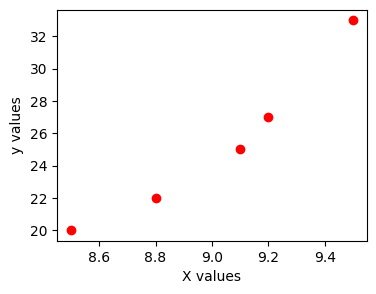

In [4]:
# Let us plot our data in a scatteer plot to see whether there is any 
# linear relationship between the dependent and independent variables
plt.figure(figsize=(4,3))
plt.scatter(X, y, color='red')
plt.xlabel('X values')
plt.ylabel('y values')

In [5]:
pd.set_option('display.float_format', lambda x: f'{x:.4f}')
myDataFrame = pd.DataFrame(X, columns=['X'])
myDataFrame['y'] = y
myDataFrame

,X,y
0,8.5000,20
1,9.1000,25
2,8.8000,22
3,9.5000,33
4,9.2000,27


### Plotting a best fitted regression line
<hr/>
To plot a line the formula used is <b>y = mx + c</b> where 
<ol>
    <li>m is slope</li>
    <li>c is intercept</li>
</ol>
<b>Explanation:</b>
<ol>
    <li>y is the output (dependent variable). y is the variable (mouse weight) we want to predict.</li>
    <li>X is the input (independent variable). We will predict y based on X.</li>
    <li>The slope m is important because it tell us how much <u>y changes for each unit increase in X</u>.</li>
    <li>The intercept c is important because it allows the regression line to shift up or down to better fit the data. <u>Without the intercept</u>, the regression line would be <u>forced to pass through the origin</u>, which may not reflect the true relationship between the variables.</li>
</ol>

In simple linear regression<br>
<ol>
    <li><b>m = covariance(X, y) / Variance(X)</b><br/></li>
    <li><b>c = covariance(X, y) / Variance(X)</b></li>
</ol>

### Covariance

Covariance is a measure of how the two variables, X and y change together. Covariance indicates the direction of the linear relationship between the two variables (positively related or negatively related). The formula for the covariance between X and y is:<br/>
<b>Cov(X, y) = Mean((X - X_mean) * (y - y_mean))</b>
<ol>
    <li>(X - X_mean) -  To find how much X deviates from the Mean of X</li>
    <li>(y - y_mean) -  To find how much y deviates from the Mean of y</li>
</ol>
<b>Multiplying the Deviations:</b><br/>
By multiplying (X - X_mean) * (y - y_mean), we check whether X and Y move together. 
<ol>
    <li>If both deviations are either positive or both negative, their product is positive, indicating that X and y tend to increase or decrease together.</li>
    <li>If one deviation is positive and the other is negative, their product is negative, indicating that X and y tend to move in opposite directions.</li>
</ol>
<b>Interpretation of Covariance:</b>
<ol>
    <li>Positive Covariance: If Cov(X,Y) > 0, then X and y tend to increase or decrease together (i.e., they have a positive linear relationship).</li>
    <li>Negative Covariance: If Cov(X,Y) < 0, then X and y tend to move in opposite directions (i.e., they have a negative linear relationship).</li>
    <li>Zero Covariance: If Cov(X,Y) = 0, then there is no linear relationship between.</li>
</ol>

In [6]:
# Let us calucate the X mean and y mean values
mean_X_value = myDataFrame['X'].mean()
mean_y_value = myDataFrame['y'].mean()
print("Mean value of mouse height (cm):", mean_X_value)
print("Mean value of mouse weight (g):", mean_y_value)

Mean value of mouse height (cm): 9.020000000000001
Mean value of mouse weight (g): 25.4


In [7]:
# Let us take every mouse height and see how much it is deviated from the average
# Calculate X - X_mean for every individual item in X
myDataFrame['X - X_mean'] = myDataFrame['X'] - mean_X_value
myDataFrame

,X,y,X - X_mean
0,8.5000,20,-0.5200
1,9.1000,25,0.0800
2,8.8000,22,-0.2200
3,9.5000,33,0.4800
4,9.2000,27,0.1800


In [8]:
# Let us take every mouse weight and see how much it is deviated from the average
# Calculate y - y_mean for every individual item in y
myDataFrame['y - y_mean'] = myDataFrame['y'] - mean_y_value
myDataFrame

,X,y,X - X_mean,y - y_mean
0,8.5000,20,-0.5200,-5.4000
1,9.1000,25,0.0800,-0.4000
2,8.8000,22,-0.2200,-3.4000
3,9.5000,33,0.4800,7.6000
4,9.2000,27,0.1800,1.6000


In [9]:
myDataFrame['(X - X_mean) * (y - y_mean)'] = myDataFrame['X - X_mean'] * myDataFrame['y - y_mean']
myDataFrame

,X,y,X - X_mean,y - y_mean,(X - X_mean) * (y - y_mean)
0,8.5000,20,-0.5200,-5.4000,2.8080
1,9.1000,25,0.0800,-0.4000,-0.0320
2,8.8000,22,-0.2200,-3.4000,0.7480
3,9.5000,33,0.4800,7.6000,3.6480
4,9.2000,27,0.1800,1.6000,0.2880


### Variance

Variance is a measure of how much the values in a dataset deviate from the mean. It quantifies the spread or dispersion of the data. The formula for the variance of a set of values X is:

<b>Var(X) = Mean((X - X_mean) ** 2)</b><br/>

<b>Interpretation of Variance:</b><br/>
Variance gives you a numerical value that represents the spread of the data.<br/>
<ol>
    <li>A higher variance means the data points are more spread out from the mean</li>
    <li>A lower variance means the data points are closer to the mean</li>
</ol>

In [10]:
myDataFrame['(X - X_mean) ^ 2'] = myDataFrame['X - X_mean'] * myDataFrame['X - X_mean']
myDataFrame

,X,y,X - X_mean,y - y_mean,(X - X_mean) * (y - y_mean),(X - X_mean) ^ 2
0,8.5000,20,-0.5200,-5.4000,2.8080,0.2704
1,9.1000,25,0.0800,-0.4000,-0.0320,0.0064
2,8.8000,22,-0.2200,-3.4000,0.7480,0.0484
3,9.5000,33,0.4800,7.6000,3.6480,0.2304
4,9.2000,27,0.1800,1.6000,0.2880,0.0324


In [11]:
# Let us add a new row MEAN and SUM
myDataFrame.loc['MEAN'] = myDataFrame.iloc[0:5].mean()
myDataFrame.loc['SUM'] = myDataFrame.iloc[0:5].sum()
myDataFrame

,X,y,X - X_mean,y - y_mean,(X - X_mean) * (y - y_mean),(X - X_mean) ^ 2
0,8.5000,20.0000,-0.5200,-5.4000,2.8080,0.2704
1,9.1000,25.0000,0.0800,-0.4000,-0.0320,0.0064
2,8.8000,22.0000,-0.2200,-3.4000,0.7480,0.0484
3,9.5000,33.0000,0.4800,7.6000,3.6480,0.2304
4,9.2000,27.0000,0.1800,1.6000,0.2880,0.0324
MEAN,9.0200,25.4000,-0.0000,0.0000,1.4920,0.1176
SUM,45.1000,127.0000,-0.0000,0.0000,7.4600,0.5880


In [12]:
covariance = myDataFrame.loc['MEAN', '(X - X_mean) * (y - y_mean)']
print("Covariance:", covariance)

Covariance: 1.4919999999999993


In [13]:
covariance_by_np = np.cov(X, y, ddof=0)
print("Covariance:", covariance_by_np)

Covariance: [[ 0.1176  1.492 ]
 [ 1.492  20.24  ]]


In [14]:
variance = myDataFrame.loc['MEAN', '(X - X_mean) ^ 2']
print("Variance:", variance)

Variance: 0.11759999999999986


In [15]:
variance_by_np = np.var(myDataFrame.iloc[0:5]['X'], ddof=0)
print("Covariance:", variance_by_np)

Covariance: 0.11759999999999986


In [16]:
variance_by_np = np.var(myDataFrame.iloc[0:5]['y'], ddof=0)
print("Covariance:", variance_by_np)

Covariance: 20.24


In [17]:
slope = covariance / variance
slope

np.float64(12.687074829931982)

In [18]:
# y = mx + c
coefficient = (myDataFrame.loc['SUM', 'y'] - (slope * myDataFrame.loc['SUM', 'X'])) / 5
coefficient

np.float64(-89.0374149659865)

In [19]:
polyfit_slope, polyfit_coefficient = np.polyfit(X, y, 1)
print(polyfit_slope)
print(polyfit_coefficient)

12.687074829931978
-89.03741496598641


In [20]:
x_fit = np.linspace(np.min(X), np.max(X), 100)
y_fit = (slope * x_fit) + coefficient

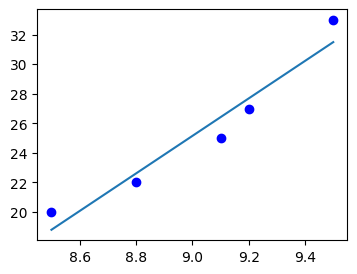

In [21]:
plt.figure(figsize=(4,3))
plt.scatter(X, y, color='blue')
plt.plot(x_fit, y_fit)

### Calculating and plotting Residuals

#### Calculate and the predict y value for each x value

In [22]:
# Let us calculate the predicted values
y_pred = slope * X + coefficient
y_pred

array([18.80272109, 26.41496599, 22.60884354, 31.48979592, 27.68367347])

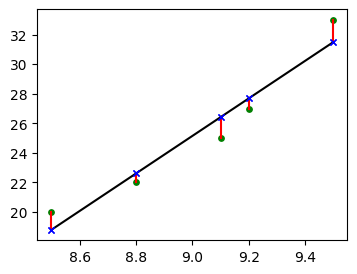

In [23]:
# plot the actual value in green round marker vs predicted value in blue x marker
# show the residuals line in red color
plt.figure(figsize=(4,3))
plt.plot(x_fit, y_fit, color='black')
for x1, y1, p1 in zip(X, y, y_pred):
    plt.plot([x1, x1], [y1, p1], color='red', marker='x', markersize=5, markevery=[1, 1], markerfacecolor='blue', markeredgecolor='blue')
plt.scatter(X, y, color='green', marker='o', s=15)

#### Calculating R squared value from the residual values

In [24]:
residuals = y - y_pred
residuals

array([ 1.19727891, -1.41496599, -0.60884354,  1.51020408, -0.68367347])

In [25]:
# sum of square of residuals of best fitted line
ss_residuals = np.sum(residuals ** 2)
ss_residuals

np.float64(6.554421768707507)

In [26]:
mean_y = np.mean(y)
average_residuals = y - mean_y
ss_tot = np.sum(average_residuals ** 2)
ss_tot

np.float64(101.19999999999999)

In [27]:
r_squared_value = 1 - (ss_residuals/ss_tot)
r_squared_value

np.float64(0.9352329864752222)

In [28]:
r_squared = r2_score(y, y_pred)
r_squared

0.9352329864752222

#### Homoscedasticity of Errors:
<ol>
    <li>In a regression model, we try to predict something (like mouse weight) based on some input (like mouse height).</li>
    <li>The difference between the actual values and the predicted values is called errors or residuals.</li>
    <li>Homoscedasticity means that no matter what the predicted value is, the size of the errors stays roughly the same.</li>
    <li>If the errors are not spread out evenly (i.e., heteroscedasticity exists), your model might be making better predictions for some values and worse predictions for others. This can make your model unreliable, especially when you try to make predictions for new data.</li>
</ol>

In [29]:
residuals = y - y_pred
residuals

array([ 1.19727891, -1.41496599, -0.60884354,  1.51020408, -0.68367347])

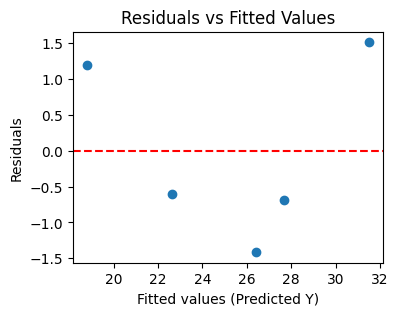

In [30]:
plt.figure(figsize=(4,3))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values (Predicted Y)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

<b>Homoscedasticity Interpretation:</b><br/>
<ol>
    <li>If the residuals are randomly scattered around 0 with no clear pattern (such as a cone or funnel shape), the assumption of homoscedasticity holds.</li>
    <li>Heteroscedasticity: If the residuals form a funnel shape (either narrowing or widening as fitted values increase), this indicates heteroscedasticity (i.e., the variance of the residuals changes with the predicted values).</li>
</ol>